In [216]:
import numpy as np
import pandas as pd

In [217]:
from IPython import get_ipython
get_ipython().config.Completer.use_jedi = False
get_ipython().config.Completer.use_readline = True


In [218]:
dataset = pd.read_csv(r"C:\Users\arman\Desktop\tested.csv")
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [219]:
dataset.shape

(418, 12)

In [220]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [221]:
dataset.isnull().sum().sum() # Total NaN value...

414

<Axes: >

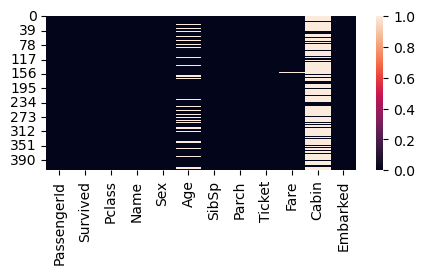

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
sns.heatmap(dataset.isnull())

In [223]:
(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1])) * 100  # Precentage of NaN value...

8.253588516746412

In [224]:
missing_value_per = dataset.isnull().sum()/dataset.shape[0] *100
missing_value_per

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [225]:
miss_vlu_clm_gre_21 = missing_value_per[missing_value_per > 21].keys()
miss_vlu_clm_gre_21

Index(['Cabin'], dtype='object')

# ******************* Delete Row & Columns. *************************

In [227]:
# dataset.drop(columns=["Cabin"], inplace=True) <-------------- For selected columns.

# dataset.dropna(inplace=True)  <------------- All NaN rows deleted.

df2_drop_clm = dataset.drop(columns=miss_vlu_clm_gre_21)
df2_drop_clm.shape

(418, 11)

In [228]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# ******************* Fill Data  ***********************

In [230]:
dataset.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [231]:
# Backword fill & Forword fill

# dataset.fillna(10)    <---------- for All NaN rows fill 10 values.
# dataset.fillna(method="ffill")   <----------Forword fill row .
# dataset.fillna(method="bfill")   <----------Backword fill row.
# dataset.fillna(method="bfill", axis=1)  <----------Backword fill column.
# dataset.fillna(method="ffill", axis=1). <----------Forword fill colummn .

# dataset["Cabin"].fillna(dataset["Cabin"].mode()[0],inplace=True)  <--------- for a particular column.

In [232]:
# For multiple columns Objects data.

# dataset.select_dtypes(include="object").isnull().sum()  <-------------select columns.
for i in dataset.select_dtypes(include="object").columns:
    # print(i)
    dataset[i].fillna(dataset[i].mode()[0],inplace=True)
dataset.head(2)   

C:\Users\arman\AppData\Local\Temp\ipykernel_12864\806345915.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0],inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S


In [233]:
# For numerical data....

for i in dataset.select_dtypes(include=['int64', 'float64']).columns:
   # print(i)
  dataset[i].fillna(dataset[i].mean(),inplace=True)
dataset.head(2)  

C:\Users\arman\AppData\Local\Temp\ipykernel_12864\542031331.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mean(),inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S


In [234]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [235]:
df = dataset.select_dtypes(include=['int64' , 'float64'])
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [236]:
df.shape  # <------------ Numerical data...

(418, 7)

<Axes: >

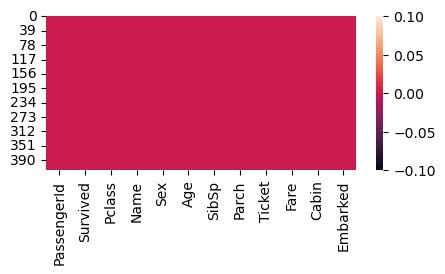

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
sns.heatmap(dataset.isnull())

## ************ Handling missing values ( SCIKIT-LEARN ) ***********

In [239]:
df1 = pd.read_csv(r"C:\Users\arman\Desktop\population.csv")
df1.head(3)

,Ranking,District,State,Population,Growth,Sex-Ratio,Literacy
0,1,Thane,Maharashtra,NaN,36.01%,886.0,84.53
1,2,North Twenty Four Parganas,West Bengal,"10,009,781",12.04%,955.0,84.06
2,3,NaN,Karnataka,"9,621,551",47.18%,916.0,NaN


In [240]:
df1.isnull().sum()

Ranking        0
District      27
State         24
Population    21
Growth        24
Sex-Ratio     10
Literacy      23
dtype: int64

In [241]:
df1.shape

(610, 7)

<Axes: >

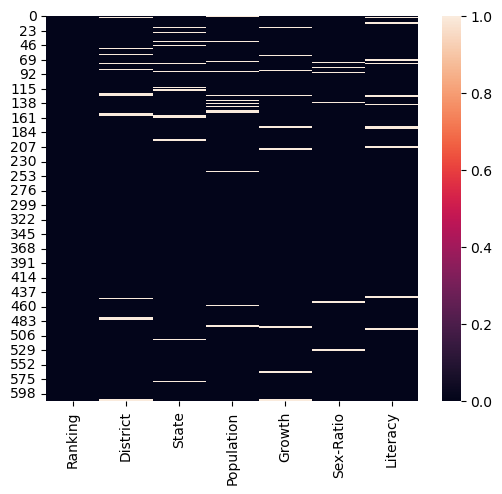

In [242]:
plt.figure(figsize=(6,5))
sns.heatmap(df1.isnull())

In [243]:
# Remove commas and convert the values to integers
df1['Population'] = df1['Population'].apply(lambda x: int(x.replace(',', '')) if isinstance(x, str) and x != '' else None)

# Remove percentage signs and convert the values to float (as a fraction)
df1['Growth'] = df1['Growth'].apply(lambda x: float(x.replace('%', '')) / 100 if isinstance(x, str) and x != '' else None)

# Now select only the numeric columns (int64 and float64)
numeric_columns = df1.select_dtypes(include=['int64', 'float64']).columns
numeric_columns


Index(['Ranking', 'Population', 'Growth', 'Sex-Ratio', 'Literacy'], dtype='object')

In [244]:
df1.head(3)

,Ranking,District,State,Population,Growth,Sex-Ratio,Literacy
0,1,Thane,Maharashtra,NaN,0.3601,886.0,84.53
1,2,North Twenty Four Parganas,West Bengal,10009781.0,0.1204,955.0,84.06
2,3,NaN,Karnataka,9621551.0,0.4718,916.0,NaN


In [245]:
from sklearn.impute import SimpleImputer

In [246]:
si = SimpleImputer(strategy='median')
ar = si.fit_transform(df1[['Ranking', 'Population', 'Growth', 'Sex-Ratio', 'Literacy']])

In [247]:
Numarical_Data = pd.DataFrame(ar, columns=numeric_columns)
Numarical_Data

,Ranking,Population,Growth,Sex-Ratio,Literacy
0,1.0,1458248.0,0.36010,886.0,84.53
1,2.0,10009781.0,0.12040,955.0,84.06
2,3.0,9621551.0,0.47180,916.0,72.13
3,4.0,9429408.0,0.30370,915.0,86.15
4,5.0,9356962.0,0.08290,860.0,89.91
...,...,...,...,...,...
605,636.0,36842.0,-0.12420,777.0,78.06
606,637.0,35320.0,0.05870,889.0,59.99
607,638.0,31564.0,0.17365,903.0,76.81
608,639.0,21167.0,0.17365,839.0,56.46


In [248]:
Numarical_Data.isnull().sum()

Ranking       0
Population    0
Growth        0
Sex-Ratio     0
Literacy      0
dtype: int64

<Axes: >

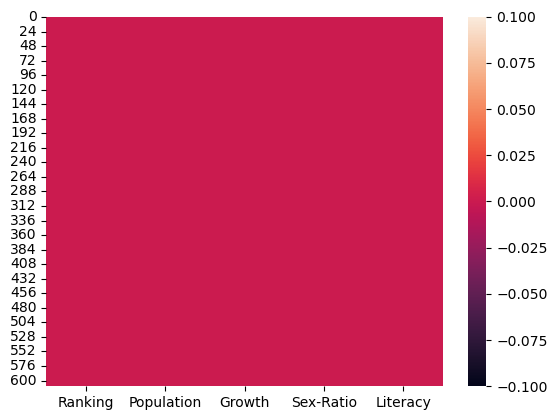

In [249]:
sns.heatmap(Numarical_Data.isnull())

In [250]:
df1.select_dtypes(include="object").columns

Index(['District', 'State'], dtype='object')

In [251]:
si_obj = SimpleImputer(strategy='most_frequent')
ar_obj = si_obj.fit_transform(df1[['District', 'State']])

In [252]:
categorical_data = pd.DataFrame(ar_obj, columns=df1.select_dtypes(include="object").columns)
categorical_data

,District,State
0,Thane,Maharashtra
1,North Twenty Four Parganas,West Bengal
2,Aurangabad,Karnataka
3,Pune,Maharashtra
4,Mumbai Suburban,Maharashtra
...,...,...
605,Nicobars,Andaman and Nicobar Islands
606,Aurangabad,Arunachal Pradesh
607,Aurangabad,Himachal Pradesh
608,Aurangabad,Arunachal Pradesh


In [292]:
final_data = pd.concat([categorical_data, Numarical_Data, ], axis=1)
final_data

,District,State,Ranking,Population,Growth,Sex-Ratio,Literacy
0,Thane,Maharashtra,1.0,1458248.0,0.36010,886.0,84.53
1,North Twenty Four Parganas,West Bengal,2.0,10009781.0,0.12040,955.0,84.06
2,Aurangabad,Karnataka,3.0,9621551.0,0.47180,916.0,72.13
3,Pune,Maharashtra,4.0,9429408.0,0.30370,915.0,86.15
4,Mumbai Suburban,Maharashtra,5.0,9356962.0,0.08290,860.0,89.91
...,...,...,...,...,...,...,...
605,Nicobars,Andaman and Nicobar Islands,636.0,36842.0,-0.12420,777.0,78.06
606,Aurangabad,Arunachal Pradesh,637.0,35320.0,0.05870,889.0,59.99
607,Aurangabad,Himachal Pradesh,638.0,31564.0,0.17365,903.0,76.81
608,Aurangabad,Arunachal Pradesh,639.0,21167.0,0.17365,839.0,56.46


In [294]:
final_data.isnull().sum()

District      0
State         0
Ranking       0
Population    0
Growth        0
Sex-Ratio     0
Literacy      0
dtype: int64

<Axes: >

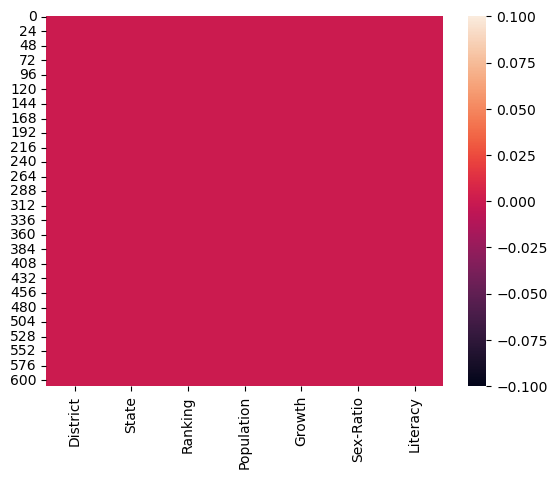

In [298]:
sns.heatmap(final_data.isnull())